In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#from math import sin, cos, sqrt, atan2, radians
import math as math

In [2]:
train = pd.read_csv("C:/Users/shabbir.hasan/Documents/Hasan/Anaconda_rep/Kaggle/New_York_City_Taxi_Fare_Prediction/generated_datasets/train_2.csv")

### Changing field type

In [3]:
# converting data type of columns
train['passenger_count'] = train['passenger_count'].astype('category')
train['year'] = train['year'].astype('category')
train['month'] = train['month'].astype('category')
train['day_of_month'] = train['day_of_month'].astype('category')
train['day_of_week'] = train['day_of_week'].astype('category')
train['weekend_weekday'] = train['weekend_weekday'].astype('category')
train['date'] = pd.to_datetime(train['date'])

###  handling time

In [4]:
#Day_of_month
train['hour'] = train.time.apply(lambda x: x[0:2])
train['minute'] = train.time.apply(lambda x: x[3:5])
train['time_30_min_bin'] = train.minute.apply(lambda x: '30' if int(x) >= 30 else '0')
train['time_15_min_bin'] = train.minute.apply(lambda x: '0' if int(x) < 15 
                                              else ('15' if int(x) >= 15 and int(x) < 30 
                                                    else ('30' if int(x) >=30 and int(x) < 45 
                                                          else '45')))

In [5]:
#dropping unused columns
train =  train.drop('minute', 1)
train =  train.drop('time', 1)
train =  train.drop('year_month', 1)

In [6]:
train.dtypes

fare_amount                 float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count            category
year                       category
month                      category
day_of_month               category
date                 datetime64[ns]
day_of_week                category
weekend_weekday            category
hour                         object
time_30_min_bin              object
time_15_min_bin              object
dtype: object

In [7]:
# changing data type
train['time_15_min_bin'] = train['time_15_min_bin'].astype('category')
train['time_30_min_bin'] = train['time_30_min_bin'].astype('category')
train['hour'] = train['hour'].astype('category')

In [8]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_month,date,day_of_week,weekend_weekday,hour,time_30_min_bin,time_15_min_bin
0,4.0,-73.994102,40.751041,-73.991257,40.754959,1,2015,3,10,2015-03-10,Tuesday,0,07,30,45
1,6.1,-73.961686,40.713017,-73.952406,40.699525,1,2011,12,17,2011-12-17,Saturday,1,00,30,45
2,9.7,-73.978325,40.753808,-73.985068,40.756177,1,2010,9,16,2010-09-16,Thursday,0,00,0,15
3,6.9,-74.001737,40.719357,-73.992353,40.740713,1,2012,6,13,2012-06-13,Wednesday,0,18,0,0
4,6.0,-73.966393,40.770531,-73.958328,40.781441,3,2015,2,4,2015-02-04,Wednesday,0,07,30,30


In [9]:
#checking for null values
train.isnull().values.any()

False

#### Cleaning lat long data to calculate radial distance

In [10]:
train['pickup_latitude'] = train['pickup_latitude'].round(6)
train['pickup_longitude'] = train['pickup_longitude'].round(6)
train['dropoff_latitude'] = train['dropoff_latitude'].round(6)
train['dropoff_longitude'] = train['dropoff_longitude'].round(6)

In [11]:
#removing lat and long with 0.0 values
train = train[train['pickup_latitude'] != 0.0]
train = train[train['pickup_longitude'] != 0.0]
train = train[train['dropoff_latitude'] != 0.0]
train = train[train['dropoff_longitude'] != 0.0]

In [12]:
#train.to_csv('clean_3.csv', index=False )

In [13]:
#train = pd.read_csv('clean_3.csv')

#####  considering lat long only between -90 and +90

In [14]:
train = train[(train["pickup_latitude"] >= -90.0) & (train["pickup_latitude"] <= 90.0)]
train = train[(train["pickup_longitude"] >= -90.0) & (train["pickup_longitude"] <= 90.0)]
train = train[(train["dropoff_latitude"] >= -90.0) & (train["dropoff_latitude"] <= 90.0)]
train = train[(train["dropoff_longitude"] >= -90.0) & (train["dropoff_longitude"] <= 90.0)]

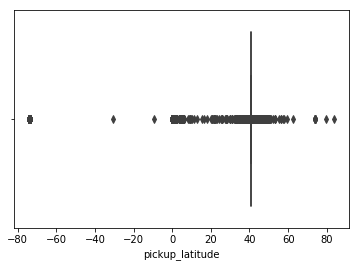

In [15]:
ax = sns.boxplot(x=train["pickup_latitude"])

C:\Users\shabbir.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


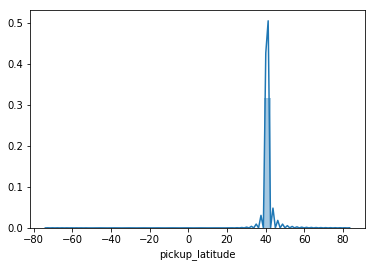

In [16]:
sns.distplot(train["pickup_latitude"])

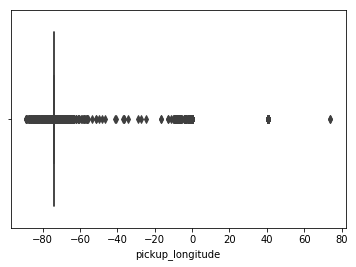

In [17]:
ax = sns.boxplot(x=train["pickup_longitude"])

C:\Users\shabbir.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Wall time: 3.51 s


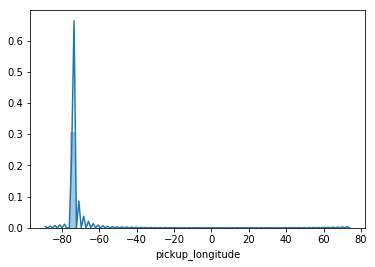

In [18]:
%%time
sns.distplot(train["pickup_longitude"])

In [19]:
#outlier removing
train = train[(train["pickup_latitude"] >= 39) & (train["pickup_latitude"] <= 46)]
train = train[(train["pickup_longitude"] <= -70) & (train["pickup_longitude"] >= -76)]
train = train[(train["dropoff_latitude"] >= 39) & (train["dropoff_latitude"] <= 46)]
train = train[(train["dropoff_longitude"] <= -70) & (train["dropoff_longitude"] >= -76)]

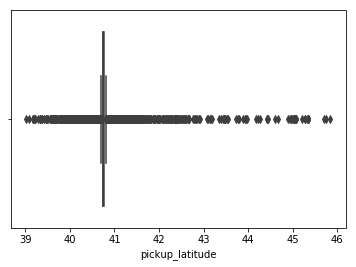

In [20]:
ax = sns.boxplot(x=train["pickup_latitude"])

C:\Users\shabbir.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


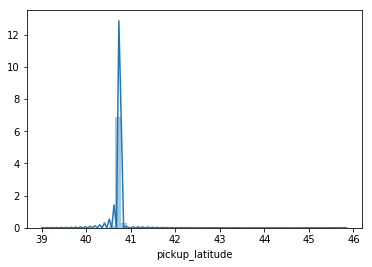

In [21]:
sns.distplot(train["pickup_latitude"])

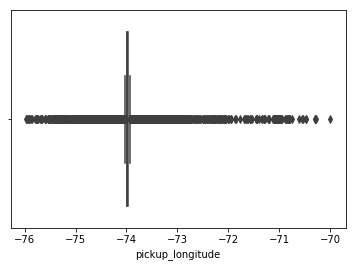

In [22]:
ax = sns.boxplot(x=train["pickup_longitude"])

C:\Users\shabbir.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Wall time: 3.54 s


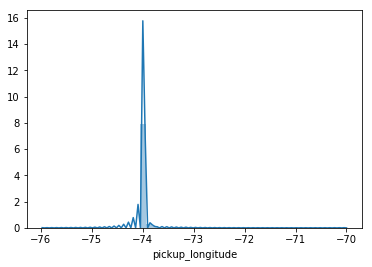

In [23]:
%%time
sns.distplot(train["pickup_longitude"])

In [24]:
train.shape

(10854270, 15)

#### calculating radial distance

In [25]:
#fun to calc dist
def radialDistance(lat1 , lon1, lat2, lon2):
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return round(d,2)

In [26]:
%%time
train['distance_travelled'] = train.apply(lambda x: radialDistance(x['pickup_latitude'], x['pickup_longitude'], 
                                           x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

Wall time: 12min 38s


In [27]:
train = train.drop('date', axis=1)

In [28]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_month,day_of_week,weekend_weekday,hour,time_30_min_bin,time_15_min_bin,distance_travelled
0,4.0,-73.994102,40.751041,-73.991257,40.754959,1,2015,3,10,Tuesday,0,07,30,45,0.50
1,6.1,-73.961686,40.713017,-73.952406,40.699525,1,2011,12,17,Saturday,1,00,30,45,1.69
2,9.7,-73.978325,40.753808,-73.985068,40.756177,1,2010,9,16,Thursday,0,00,0,15,0.63
3,6.9,-74.001737,40.719357,-73.992353,40.740713,1,2012,6,13,Wednesday,0,18,0,0,2.50
4,6.0,-73.966393,40.770531,-73.958328,40.781441,3,2015,2,4,Wednesday,0,07,30,30,1.39


In [29]:
train.shape

(10854270, 15)

In [30]:
train.to_csv('clean_v2_01-02.csv', index=False )